# Importing the Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




In [9]:
restaurants=pd.read_csv('Restaurant names and Metadata.csv')
restaurants.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [11]:
restaurants.dtypes

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object

In [13]:
restaurants['Cost']=pd.to_numeric(restaurants['Cost'].str.replace(',',''))
restaurants.dtypes

Name           object
Links          object
Cost            int64
Collections    object
Cuisines       object
Timings        object
dtype: object

In [15]:
restaurants.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [17]:
review=pd.read_csv('Restaurant reviews.csv')
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [19]:
review.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [21]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [23]:
review.dropna(inplace=True)
review.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [25]:
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


Note We need to keep the Rating column as a number in order to calculate the overall Rating for a Restaurant. As seen in the above Example, an user has entered "Like" in the place of the rating. This is a flaw in the data input system, as the Rating entry should be restricted to only numbers. In order to avoid any disruption, we ignore this entry.

In [27]:
review=review[review['Rating']!='Like']
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [35]:
review['Rating']=pd.to_numeric(review['Rating'])
review[['Reviews', 'Followers']] = review['Metadata'].str.split(',', expand=True)
review['Reviews'] = pd.to_numeric(review['Reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])
review['Time'] = pd.to_datetime(review['Time'])
review=review.loc[:,['Restaurant','Reviewer','Review','Rating','Reviews','Followers','Time','Pictures']]
review.dtypes

Restaurant            object
Reviewer              object
Review                object
Rating               float64
Reviews                int64
Followers            float64
Time          datetime64[ns]
Pictures               int64
dtype: object

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


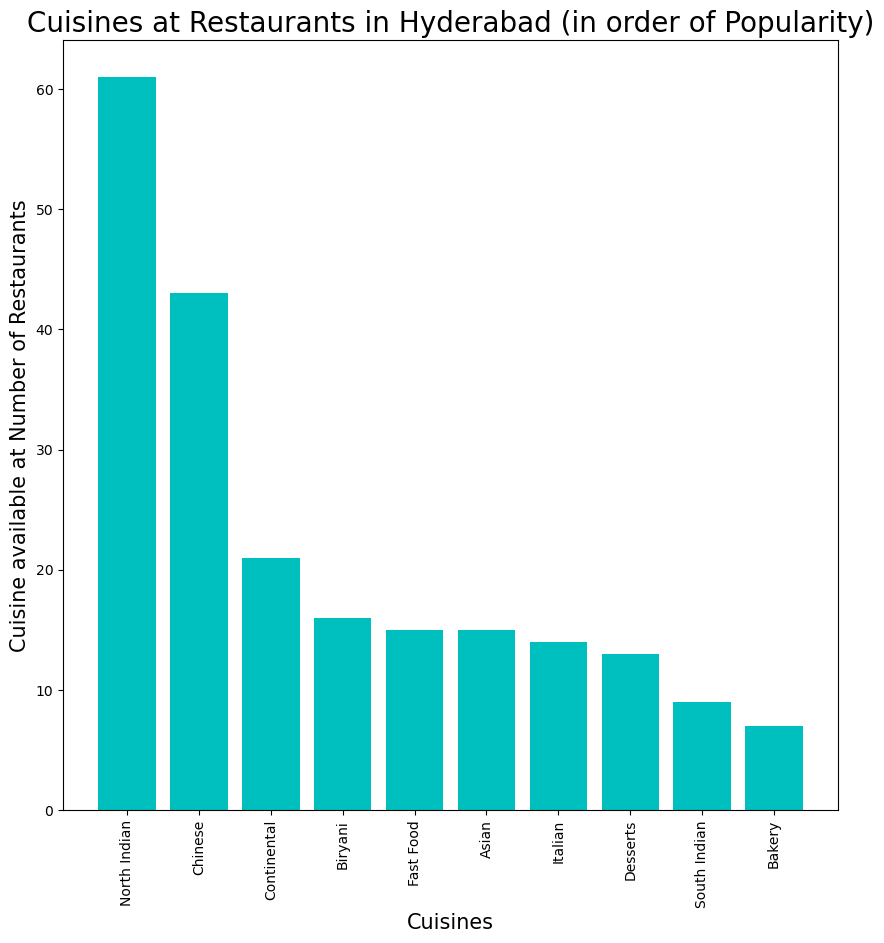

In [41]:
# Assuming restaurants DataFrame is already defined and loaded with data
cuisine_list = restaurants.Cuisines.str.split(', ')
cuis = {}

# Create dictionary with cuisine counts
for i in cuisine_list:
    for j in i:
        if j in cuis:
            cuis[j] += 1
        else:
            cuis[j] = 1

# Create DataFrame from dictionary
cuis_df = pd.DataFrame(cuis.values(), index=cuis.keys(), columns=['Counts of Restaurants'])

# Sort the DataFrame
cuis_df.sort_values(by='Counts of Restaurants', ascending=False, inplace=True)

# Get the top 10 cuisines
top_10_cuis = cuis_df.head(10)

print('The Top 10 Cuisines are:\n', top_10_cuis)

# Reset index for plotting
top_10_cuis = top_10_cuis.reset_index()

# Plotting
plt.figure(figsize=(10,10))
plt.bar(top_10_cuis['index'], top_10_cuis['Counts of Restaurants'], color='c')
plt.xlabel('Cuisines', size=15)
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants', size=15)
plt.title('Cuisines at Restaurants in Hyderabad (in order of Popularity)', size=20)
plt.show()


**Observation** Although located in South India, One of the most dominating Cuisines of Hyderabad is North Indian Food, followed by Chinese and Continental. The Famous Hyderabadi Biriyani is attributed as a cuisine in Itself and holds the 4th position. The number of Cuisines available are huge showing the excellent food options present in Hyderabad- Truly a foodie's Paradise it is!

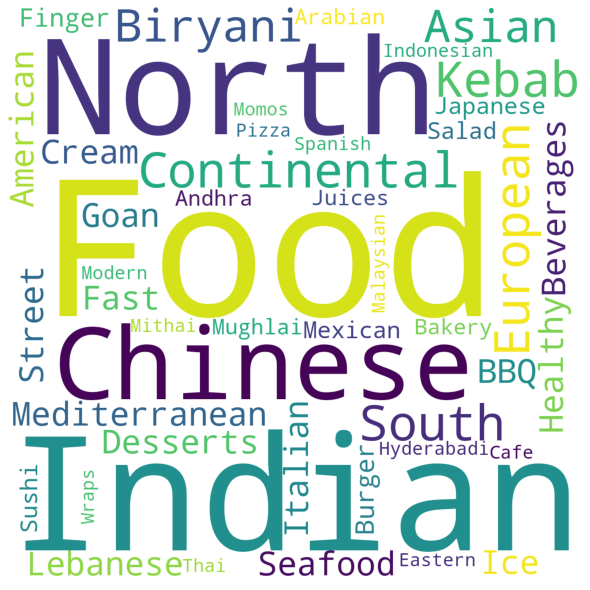

In [14]:
word_list=cuis.keys()
strr=''
for i in word_list:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'white') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

# Restaurant wise Cost in Hyderabad

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\1739198802.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rest_cost=restaurants.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')


The Analysis upon 105 restaurants show- The Average Cost at a Restaurant in Hyderabad is ₹861.4285714285714
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The Top 5 Costliest Restaurants of Hyderabad are:

                                                 Name    Cost
23               Collage - Hyatt Hyderabad Gachibowli  2800.0
35                   Feast - Sheraton Hyderabad Hotel  2500.0
0                                   10 Downing Street  1900.0
48  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
20            Cascade - Radisson Hyderabad Hitec City  1800.0
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The Top 5 Cheapest Re

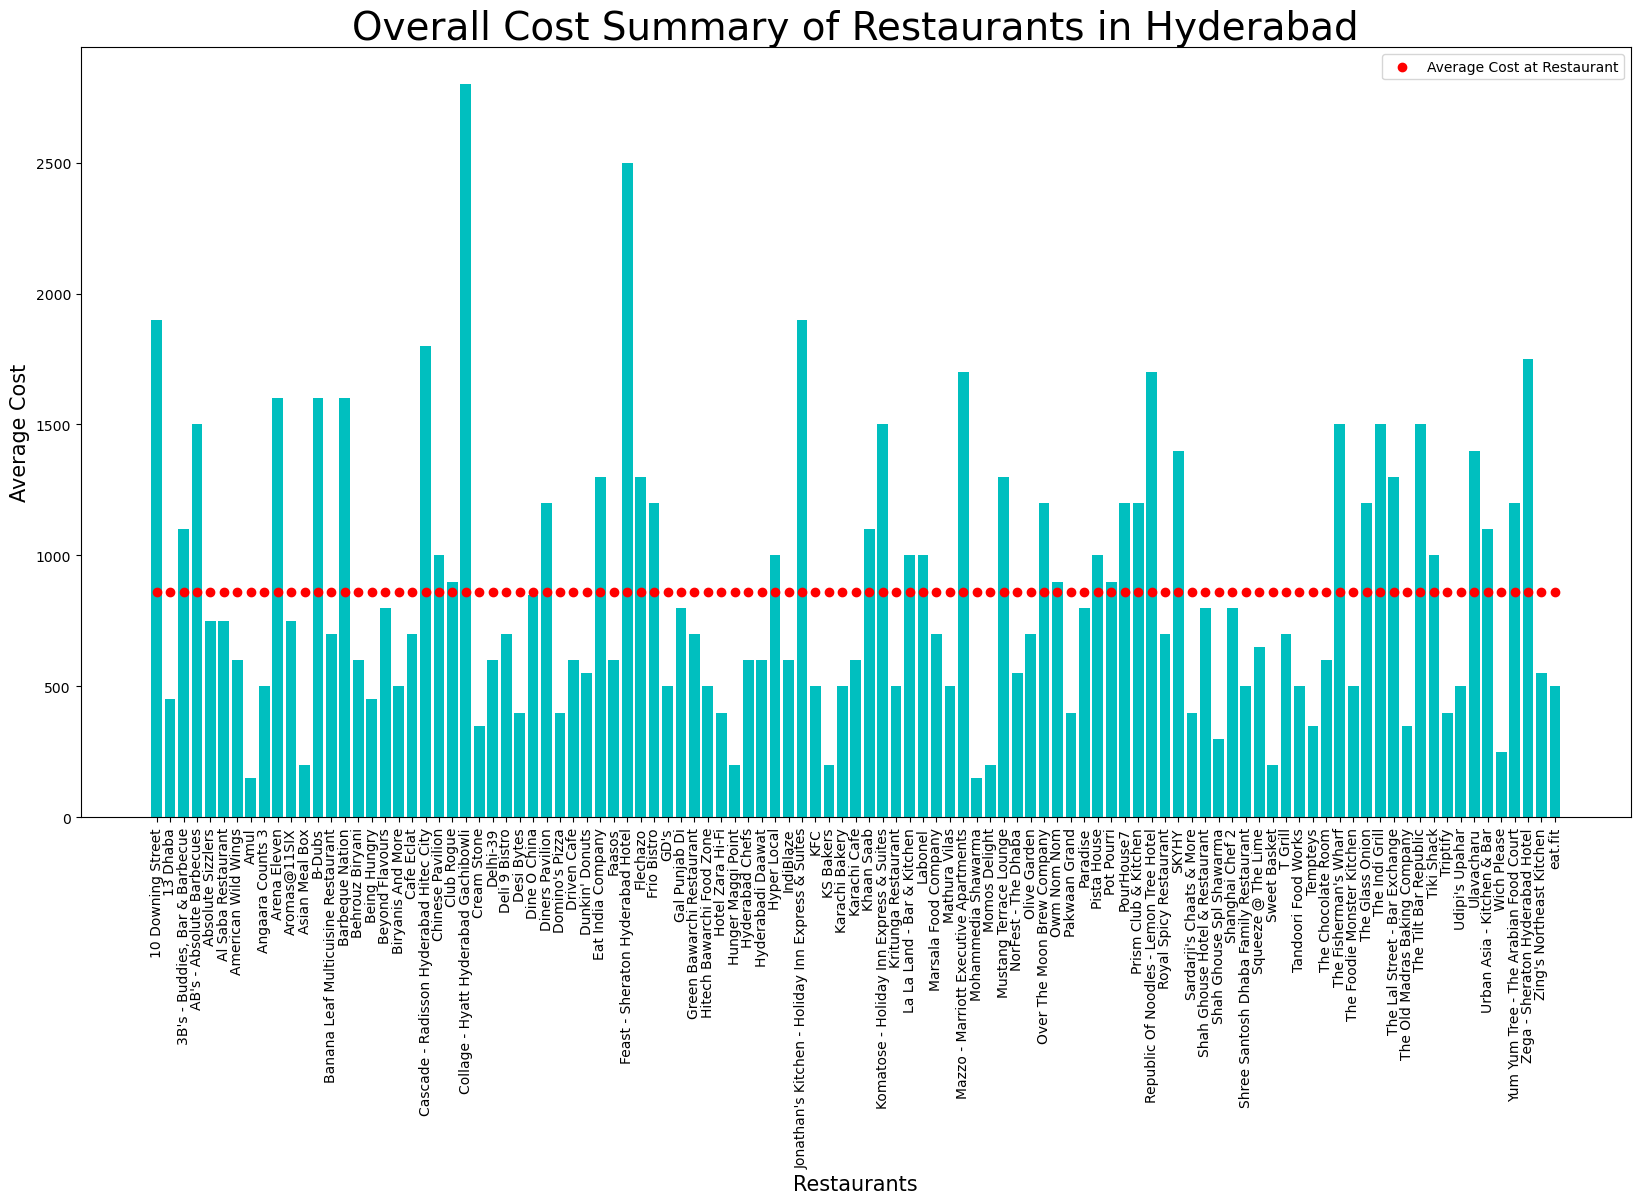

In [46]:
rest_cost=restaurants.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')
avg=np.average(rest_cost['Cost'])

plt.figure(figsize=(20,10))
plt.bar(rest_cost['Name'],rest_cost['Cost'],color='c')
for i in rest_cost['Name']:
    plt.scatter(i,avg,color='r')
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants in Hyderabad',size=28)
plt.legend(['Average Cost at Restaurant'])
rest_cost.sort_values(by='Cost',ascending=False,inplace=True)
print('The Analysis upon {} restaurants show- The Average Cost at a Restaurant in Hyderabad is ₹{}'.format(len(rest_cost),avg))
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')
print('The Top 5 Costliest Restaurants of Hyderabad are:\n')
print(rest_cost[:5])
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')
print('The Top 5 Cheapest Restaurants of Hyderabad are:\n')
print(rest_cost[-5:])
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')

**Observation:** The Red line marker is used to identify the avergae costs of restaurants in Hyderabad. As seen in the graphical presentation- the average cost for eating at a restaurant in Hyderabad is ₹ 861.42- which is fairly high. One of the main reasons for this high value is Zomato only caters to established restaurants, and only they are available in the list present. The cheapest stores are Shawarma and Maggi Joints. The huge number of street shops have been ignored. This is one drawback of the dataset- that it can only be used to summarize the cost and reviews at established restaurants- and not for the entire city of Hyderabad.



rests=restaurants.Name.unique()
rest_str=''
for i in rests:
    rest_str=rest_str+i+' '
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(rest_str) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [17]:
review.Restaurant.nunique()

100

A total of 7442 users have sumbitted a review- with each user submitting at an average of 1.3375436710561677 reviews
----------The Top 15 Users who have submitted the most reviews------------
                            Reviewer  Review Count
654                           Ankita            13
3855                     Parijat Ray            13
2652                           Kiran            12
7009                    Vedant Killa            11
2311                       Jay Mehta            11
3131           Manojkumar D Nambisan            10
6126                         Sravani            10
5954                      Siva Kumar            10
4256                        Priyanka            10
264   Age Of Foodies (Suraj Karambe)            10
4130                 Prasun Gokhlani             9
3998               Prachita Jayaswal             9
3694                           Nillu             9
2642                 Khushboo Pandey             9
7172                           Vinay       

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\846337059.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_reviewer=review.groupby('Reviewer').apply(lambda x:x['Reviewer'].count()).reset_index(name='Review Count')
C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\846337059.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_reviewer_count=top_reviewer.groupby('Review Count').apply(lambda x:x['R

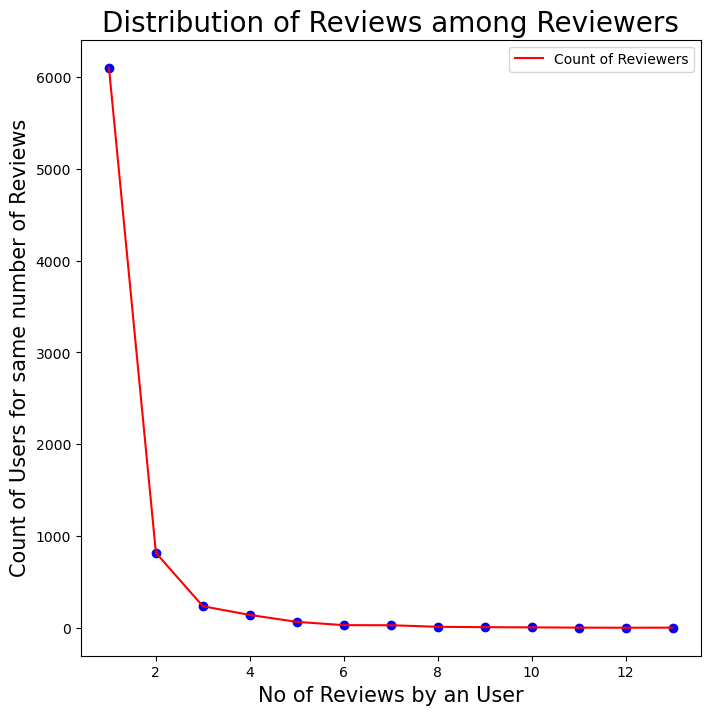

In [54]:
top_reviewer=review.groupby('Reviewer').apply(lambda x:x['Reviewer'].count()).reset_index(name='Review Count')
top_reviewer=top_reviewer.sort_values(by='Review Count',ascending=False)
print('A total of {} users have sumbitted a review- with each user submitting at an average of {} reviews'.format(review.Reviewer.nunique(),np.average(review.Reviewer.value_counts())))
print('----------The Top 15 Users who have submitted the most reviews------------')
print(top_reviewer[:15])
top_reviewer_count=top_reviewer.groupby('Review Count').apply(lambda x:x['Review Count'].count()).reset_index(name='Counts')
plt.figure(figsize=(8,8))
plt.plot(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='r')
plt.scatter(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='b')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Count of Users for same number of Reviews',size=15)
plt.title('Distribution of Reviews among Reviewers',size=20)
plt.legend(['Count of Reviewers'])

**Observation** The distribution presents a very obvious pattern. Since most of the users who have dined/ordered tend to ignore the ratings, the overall distribution shows a great number of count for users who have submitted only 1 reponse- but decreases rapidly upon moving to 2-3 reviews. The chart is appearing as an asymptote towards the higher number of reviews.

# Reviews vs Ratings Distribution from the list of Reviewers

A total of 7442 users have sumbitted a rating- with an average rating of-> 3.578301536992077 
----------Ratings submitted by the Top 15 Users------------
                          Reviewer  Review Count  Average Ratings
0                           Ankita            13         3.923077
1                      Parijat Ray            13         3.192308
2                            Kiran            12         4.500000
3                     Vedant Killa            11         4.000000
4                        Jay Mehta            11         3.727273
5            Manojkumar D Nambisan            10         3.700000
6                          Sravani            10         4.000000
7                       Siva Kumar            10         3.600000
8                         Priyanka            10         2.600000
9   Age Of Foodies (Suraj Karambe)            10         3.500000
10                 Prasun Gokhlani             9         4.000000
11               Prachita Jayaswal             9      

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\3870487405.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_ratings=review.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\3870487405.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_ratings_plot=review_ratings.groupby('Review Count').apply(l

Text(0.5, 1.0, 'Average Ratings per Review Submitted Distribution')

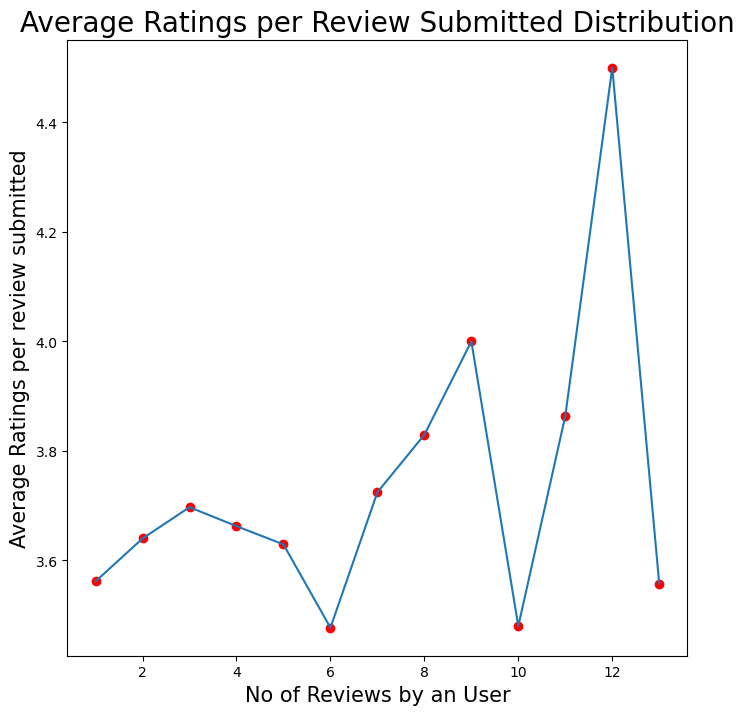

In [56]:
review_ratings=review.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
print('A total of {} users have sumbitted a rating- with an average rating of-> {} '.format(review.Reviewer.nunique(),np.average(review_ratings['Average Ratings'])))
review_ratings=pd.merge(top_reviewer,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers=review_ratings[:15]
print('----------Ratings submitted by the Top 15 Users------------')
print(top_reviewers)
review_ratings_plot=review_ratings.groupby('Review Count').apply(lambda x:np.average(x['Average Ratings'])).reset_index(name='Average')
plt.figure(figsize=(8,8))
plt.plot(review_ratings_plot['Review Count'],review_ratings_plot['Average'])
plt.scatter(review_ratings_plot['Review Count'],review_ratings_plot['Average'],color='r')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Average Ratings per review submitted',size=15)
plt.title('Average Ratings per Review Submitted Distribution',size=20)

**Observation:** The chart displays almost a comparable rating when the users who have <5 reviews are considered. But as the number of review increases more than 5, the distribution is much more volatile. One of the primary reasons for this pattern in the chart is the decreasing number of reviewers as the number of review increases- so if one user has provided lower ratings, the overall falls- as can be seen for 10 review users. On the other hand, Only one reviewer was present in the list who submitted 12 responses- and since the average of his/her reviews as pretty good, it is seen as a spike in the chart.

# Identifying the Rating pattern of the Top Reviwerers by Restaurants

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\2993313624.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_reviews_avg=top_reviews.groupby(['Reviewer','Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')


Text(0.5, 1.0, 'Ratings of the Restaurants by the Top Reviewers')

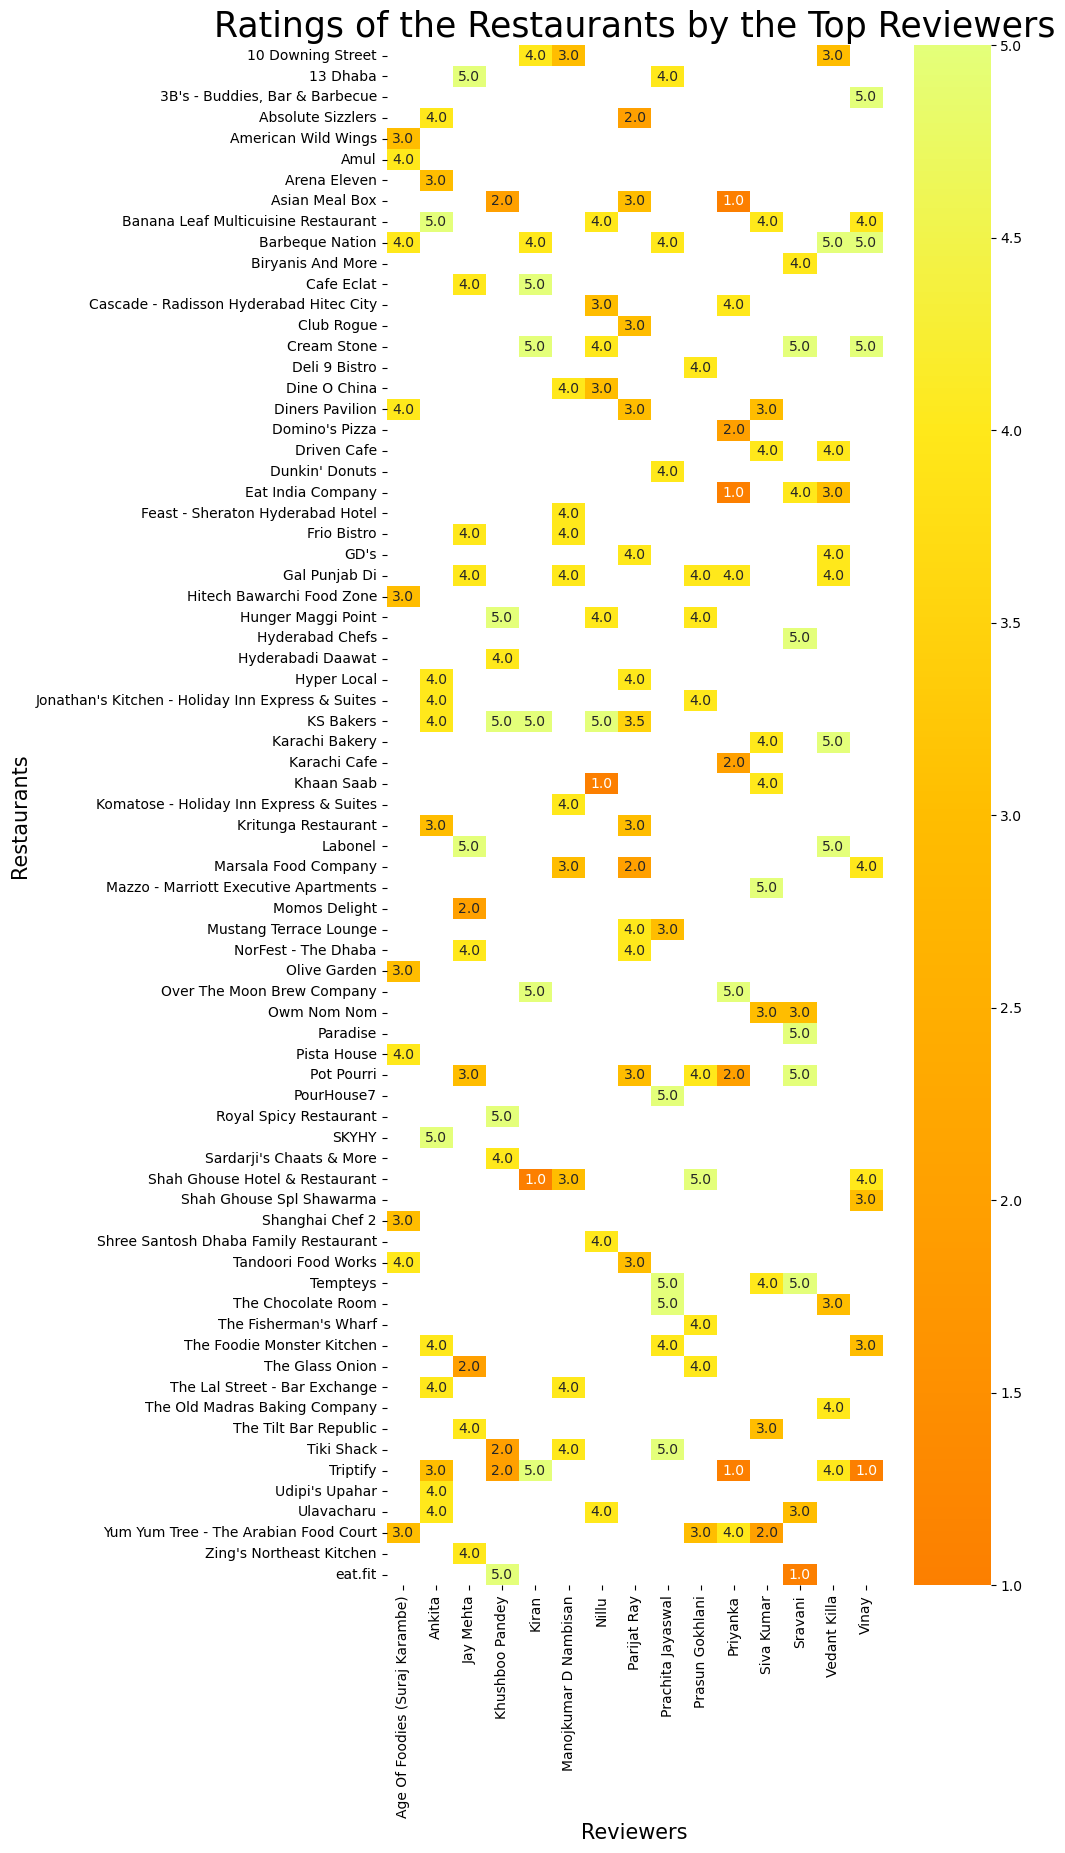

In [58]:
top_reviews=pd.merge(top_reviewers,review,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviews_avg=top_reviews.groupby(['Reviewer','Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
rating_pivot=pd.pivot(top_reviews_avg,values='Average Ratings',index='Restaurant',columns='Reviewer')
rating_pivot.replace(np.NaN,0)
plt.figure(figsize=(8,20))
sns.heatmap(rating_pivot,annot=True,fmt='.1f',cmap='Wistia_r')
plt.xlabel('Reviewers',size=15)
plt.ylabel('Restaurants',size=15)
plt.title('Ratings of the Restaurants by the Top Reviewers',size=25)

**Observation:** As seen from the User Ratings, 4 is the general average as that has been given out to the restaurants most by the Top Reviewers. 5 depicts extraordinary experience, while 2 and 1 are not satisfactory performances. The sentiment as to why a user gives a rating is dependent on a number of factors- Taste/Quality/Ambience/Quantity/Service etc. So among the restaurants above, the ones which are seen having multiple orders but poor ratings- need to be marked in the poor category, while the ones with more 4 or 5 ratings may be classified as Star Restaurants.

# Reviewer/Follower varitation with time

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\2722489802.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_follow_1=review.groupby('Year').apply(lambda x:np.sum(x['Reviews'])).reset_index(name='Total Reviews')
C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\2722489802.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_follow_2=review.groupby('Year').apply(lambda x:np.max(x['Followers'

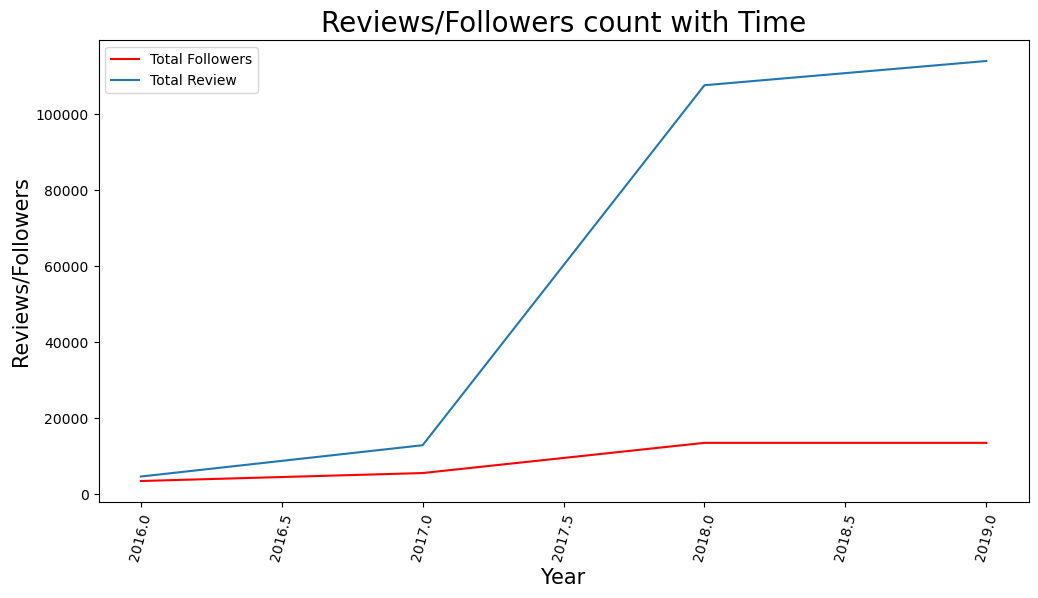

In [60]:
review['Year'] = pd.DatetimeIndex(review['Time']).year
review_follow_1=review.groupby('Year').apply(lambda x:np.sum(x['Reviews'])).reset_index(name='Total Reviews')
review_follow_2=review.groupby('Year').apply(lambda x:np.max(x['Followers'])).reset_index(name='Total Followers')
review_follow=pd.merge(review_follow_1,review_follow_2,how='inner',left_on='Year',right_on='Year')
plt.figure(figsize=(12,6))
plt.plot(review_follow['Year'],review_follow['Total Followers'],color='r')
plt.plot(review_follow['Year'],review_follow['Total Reviews'])
plt.xlabel('Year',size=15)
plt.xticks(rotation=75)
plt.ylabel('Reviews/Followers',size=15)
plt.title('Reviews/Followers count with Time',size=20)
plt.legend(['Total Followers','Total Review'])

**Observation:** The number of Followers and The number of Reviewers are shown by the Years. As expected, the number of reviewers are far more than followers.

# Average Rating of the Restaurants- Overall

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\506105372.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rats=review.groupby("Restaurant").apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')


The Analysis upon 100 restaurants show- The Average Ratings for Restaurants in Hyderabad is 3.6018905398523047
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
The 5 Best Rated Restaurants are:
                         Restaurant  Average Ratings
3        AB's - Absolute Barbecues             4.88
11                          B-Dubs             4.81
2   3B's - Buddies, Bar & Barbecue             4.76
67                        Paradise             4.70
35                        Flechazo             4.66
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
The 5 Worst Rated Restaurants are:
           Restaurant  Average Ratings
14   Behrouz Bir

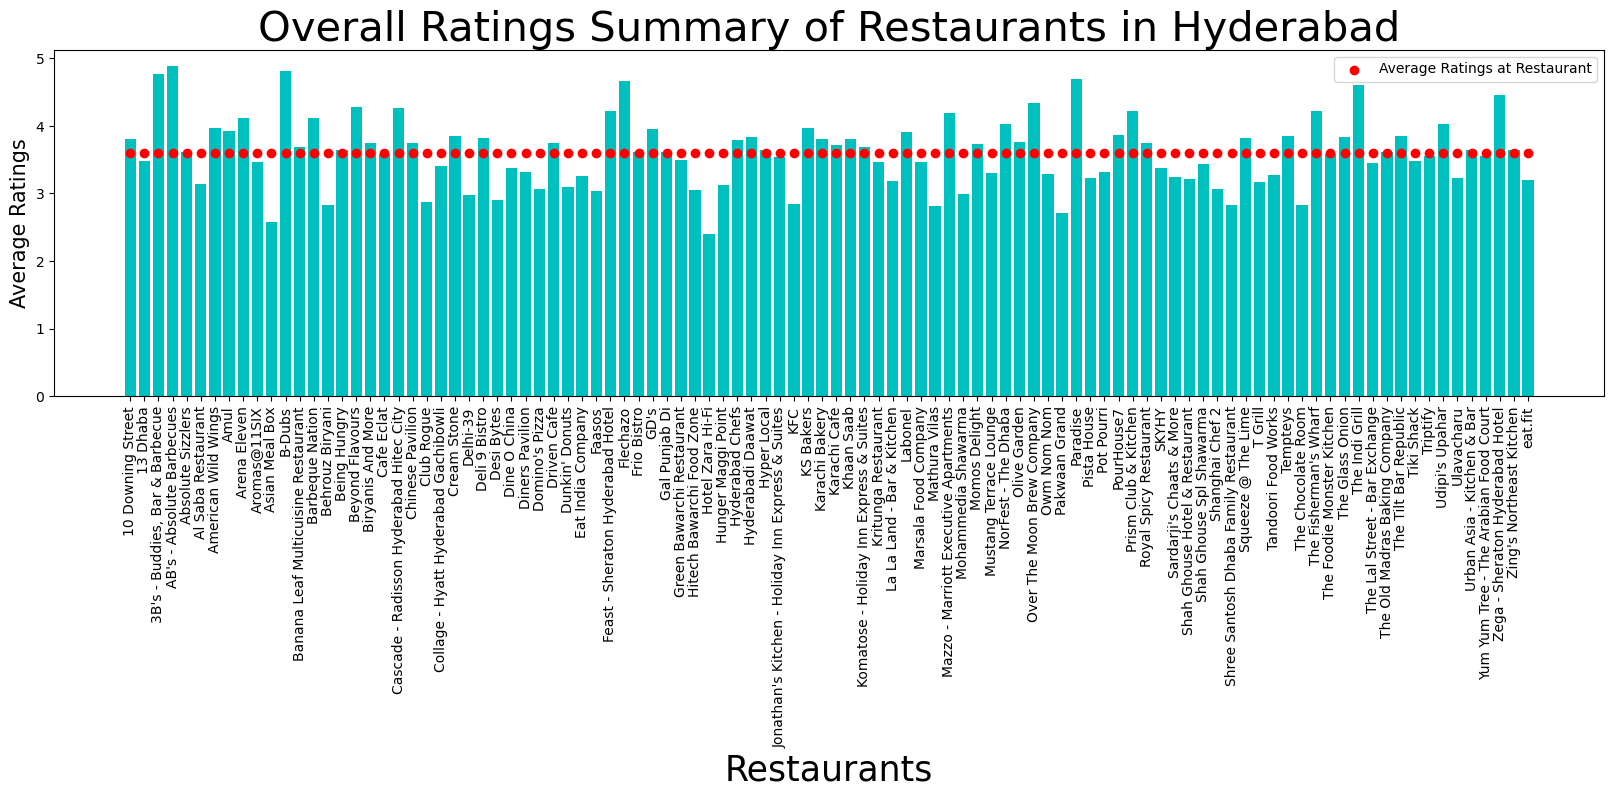

In [64]:
rats=review.groupby("Restaurant").apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
avg=np.average(rats['Average Ratings'])
plt.figure(figsize=(20,4.5))
plt.bar(rats["Restaurant"],rats['Average Ratings'],color='c')
for i in rats["Restaurant"]:
    plt.scatter(i,avg,color='r')
plt.xlabel('Restaurants',size=25)
plt.xticks(rotation=90)
plt.ylabel('Average Ratings',size=15)
plt.title('Overall Ratings Summary of Restaurants in Hyderabad',size=30)
plt.legend(['Average Ratings at Restaurant'])
rats.sort_values(by='Average Ratings',ascending=False,inplace=True)
print('The Analysis upon {} restaurants show- The Average Ratings for Restaurants in Hyderabad is {}'.format(len(rats),avg))
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')
print('The 5 Best Rated Restaurants are:\n',rats[:5])
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')
print('The 5 Worst Rated Restaurants are:\n',rats[-5:])
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')

**Observation:** An average of 100 restaurants show that the Average Rating for Restaurants in Hyderabad is 3.6- which is a fairly good depiction that of the Amazing Cuisines in Hyserabad, as well as the standards of Hyderabadi Restaurants. Many restaurants have a rating much higher than 4- which shows a good sign. Let us undersatnd the performance of the Restaurants as an yearwise summary in the below portion.


# Distributing the words in the reviews submitted by the Reviewers¶

**PS.** Removing the punctuation marks first- In order to ease the process of sp,itting the words. Also all the words are converetd into lower case for easily comparing them.

In [70]:
def word_req(strr):
    strs=''
    punctutations=[',','!','@','"',"'",'(',')','/','-','*','$',':',';','#','%','&']
    breaks=['\n','.']
    strr1=strr.lower()
    for i in strr1:
        for j in i:
            if j in punctutations:
                continue 
            elif j in breaks:
                strs=strs+' '
            else:
                strs=strs+j
    return strs

In [72]:
review_list=review.groupby('Review').apply(lambda x:word_req(x['Review'].str).split()).reset_index(name='Words List')
merged_review=pd.merge(review,review_list,how='inner',left_on='Review',right_on='Review')
merged_review

C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\706388428.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_list=review.groupby('Review').apply(lambda x:word_req(x['Review'].str).split()).reset_index(name='Words List')


,Restaurant,Reviewer,Review,Rating,Reviews,Followers,Time,Pictures,Year,Words List
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2.0,2019-05-25 15:54:00,0,2019,"[the, ambience, was, good, food, was, quite, g..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2.0,2019-05-25 14:20:00,0,2019,"[ambience, is, too, good, for, a, pleasant, ev..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3.0,2019-05-24 22:54:00,0,2019,"[a, must, try, great, food, great, ambience, t..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1.0,2019-05-24 22:11:00,0,2019,"[soumen, das, and, arun, was, a, great, guy, o..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2.0,2019-05-24 21:37:00,0,2019,"[food, is, good, we, ordered, kodi, drumsticks..."
...,...,...,...,...,...,...,...,...,...,...
9949,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,53,54.0,2016-06-05 00:08:00,0,2016,"[madhumathi, mahajan, well, to, start, with, n..."
9950,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2,53.0,2016-06-04 22:01:00,0,2016,"[this, place, has, never, disappointed, us, th..."
9951,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,65,423.0,2016-06-03 10:37:00,3,2016,"[bad, rating, is, mainly, because, of, chicken..."
9952,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,13,144.0,2016-05-31 17:22:00,0,2016,"[i, personally, love, and, prefer, chinese, fo..."


C:\Users\YASEEN\AppData\Local\Temp\ipykernel_7788\2290239047.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pic_yr = merged_review.groupby('Year').apply(lambda x: x['Pictures'].count()).reset_index(name='Pic Count')


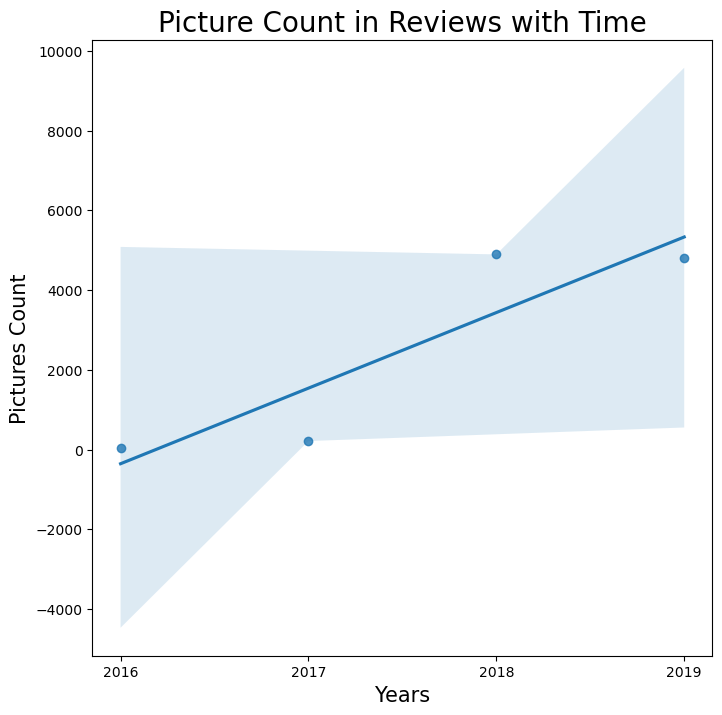

In [76]:
# Group by 'Year' and count the 'Pictures', then reset the index
pic_yr = merged_review.groupby('Year').apply(lambda x: x['Pictures'].count()).reset_index(name='Pic Count')

# Plotting
plt.figure(figsize=(8,8))
sns.regplot(x='Year', y='Pic Count', data=pic_yr)
plt.xlabel('Years', size=15)
plt.xticks(np.arange(np.min(pic_yr['Year']), np.max(pic_yr['Year'])+1))
plt.ylabel('Pictures Count', size=15)
plt.title('Picture Count in Reviews with Time', size=20)
plt.show()


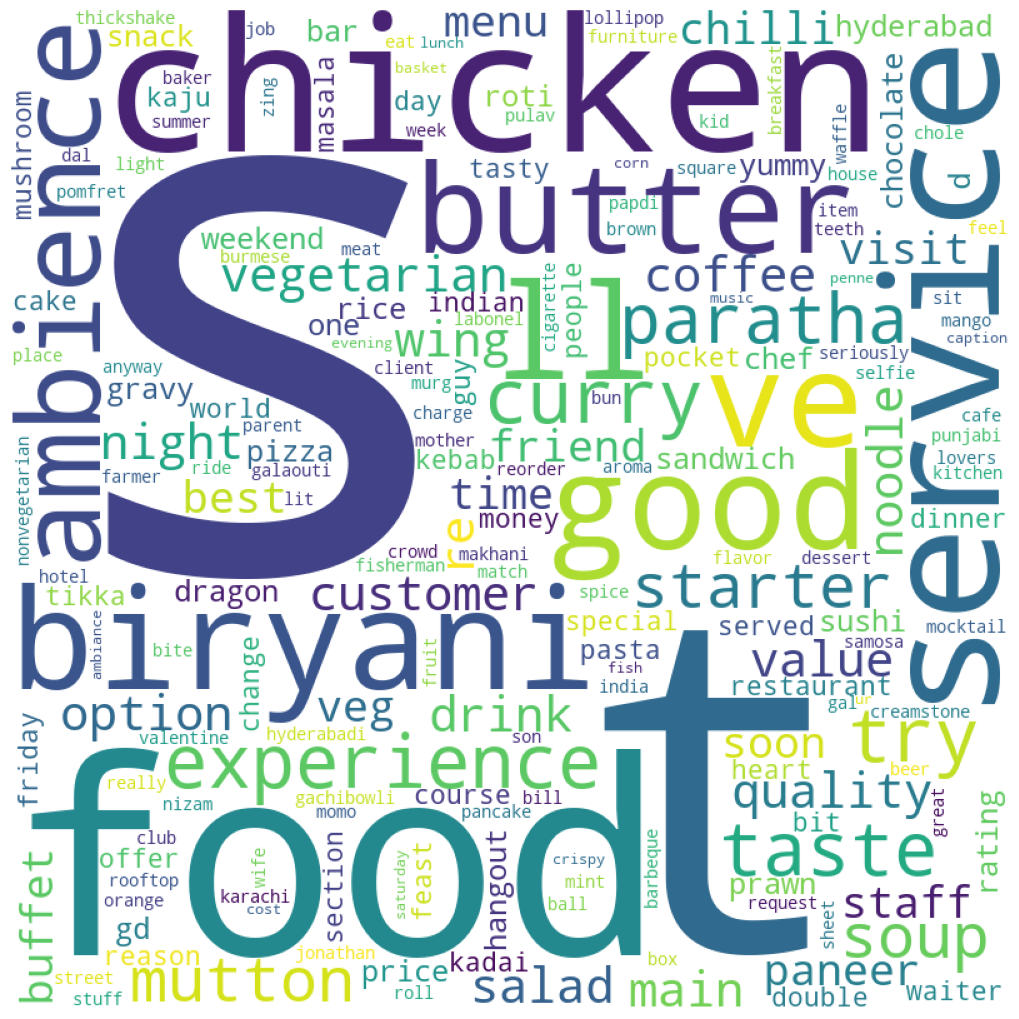

In [92]:
review_str=''
for i in modified_reviews:
    review_str=review_str+i+' '
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(review_str) 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)